### LOGISTIC REGRESSION (MNIST)

In [100]:
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
# Nepali Devnagari Dataset (InspiringLab/NCD)
from tools.nepali_characters import split
X_train,y_train,X_test,y_test,valid_set_x,valid_set_y = split(training_per=0.8,test_per=0.19,validation_per=0.01)

In [138]:
# # TODO BUG: yet to solve y_labels values (all values are 39)
# # Nepali Devnagari Dataset (Prasanna1991/DHCD_Dataset)
# data = np.load('data/dataset.npz')
# X_train, y_train, X_test,y_test = data['arr_0'],data['arr_1'],data['arr_2'],data['arr_3']
# X_train = X_train.reshape(X_train.shape[0], -1)
# X_test = X_test.reshape(X_test.shape[0], -1)

In [139]:
# Download and prepare MNIST dataset
from tools.prepare_mnist import MNIST
mnist = MNIST()
mnist.init()

# Loading the data
X_train, y_train, X_test, y_test, classes = mnist.load()

Dataset already saved. Skipped downloading train-images-idx3-ubyte.gz
Dataset already saved. Skipped downloading t10k-images-idx3-ubyte.gz
Dataset already saved. Skipped downloading train-labels-idx1-ubyte.gz
Dataset already saved. Skipped downloading t10k-labels-idx1-ubyte.gz
Download complete.
Save complete.


### Visualizing some images of dataset

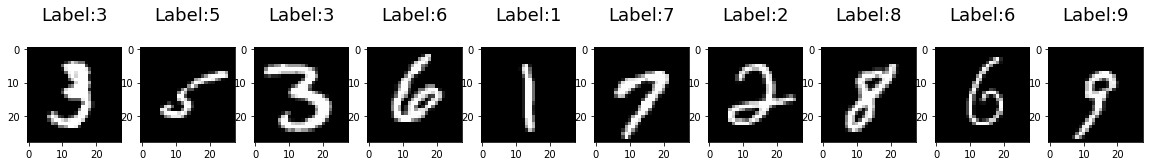

In [140]:
import math
img_side = int(math.sqrt(X_train.shape[1]))
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[10:20], y_train[10:20])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (img_side,img_side)), cmap=plt.cm.gray)
    plt.title('Label:%i\n' % label, fontsize = 18)

### Logistic Regression

In [141]:
model = LogisticRegression(solver='lbfgs')

In [ ]:
# Train the model
model.fit(X_train,y_train)

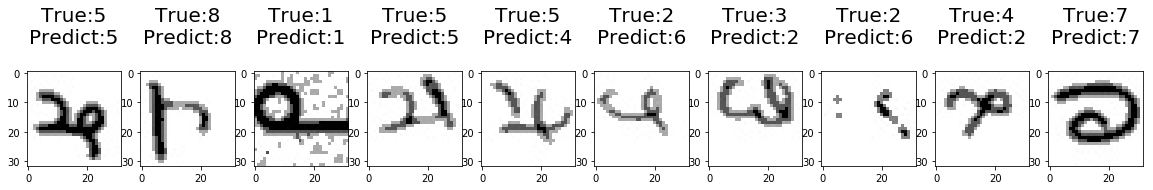

In [136]:
# Predict the image

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_test[110:120], y_test[110:120])):
    prediction = model.predict(image.reshape(1,-1))
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (img_side,img_side)), cmap=plt.cm.gray)
    plt.title('True:%i\nPredict:%i\n' % (label,prediction), fontsize = 20)

Note: Notice the error in last image. It predicts 2 as 8. (Explainable)

### Model Performance

In [107]:
# Test Accuracy
accuracy = model.score(X_test,y_test)
accuracy

0.37230406599882143

In [108]:
# List of Predictions
y_test_pred = model.predict(X_test)

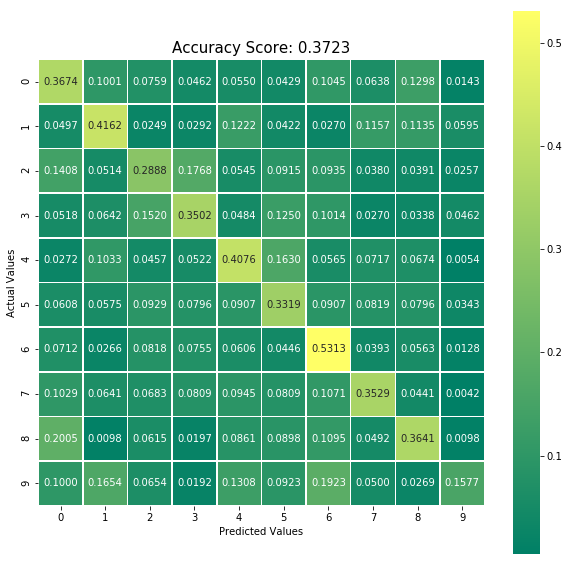

In [109]:
# Visualization of Confusion Matrix
import seaborn as sns

cm = metrics.confusion_matrix(y_test,y_test_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,10))
sns.heatmap(cm_normalized, annot=True, fmt=".4f", linewidths=.5, square = True, cmap = 'summer');
plt.ylabel('Actual Values');
plt.xlabel('Predicted Values');
all_sample_title = 'Accuracy Score: {:.4f}'.format(accuracy) 
plt.title(all_sample_title, size = 15);

From the image above, we can find that digits like 5,2,8 are harder to recognize compared to digits like 0,1. (Probabilities)